In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import core.experiment as exp



%load_ext autoreload
%autoreload 2

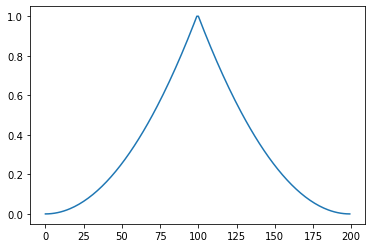

In [11]:
Y = np.concatenate((np.linspace(0, 1, 100), 1-np.linspace(0, 1, 100)), axis=0)
YY = np.power(Y, 2)

plt.plot(YY)

In [31]:
z = torch.Tensor([
                     [0.1, 0.1],    #-> group / class 1
                     [0.2, 0.2],    #-> group / class 2
                     [0.4, 0.4],    #-> group / class 2
                     [0.0, 0.0]     #-> group / class 0
              ])

labels = torch.LongTensor([1, 3, 3, 0])
# labels = labels.unsqueeze(1).expand(-1, z.size(1))
# print(labels)

# unique_labels, labels_count = labels.unique(dim=0, return_counts=True)
# print(unique_labels, labels_count)

# res = torch.zeros_like(unique_labels, dtype=torch.float).scatter_add_(0, labels, samples)
# res = res / labels_count.float().unsqueeze(1)


In [27]:
labels = torch.LongTensor([1, 3, 3, 0])
unique_labels, I = labels.unique(return_inverse=True)

In [ ]:
class SphericalLinear(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        self.w = torch.nn.parameter(
            torch.randn()
        )

In [19]:
points = torch.randn(10, 128)
points = points / torch.norm(points, dim=1, p=2, keepdim=True)
points = torch.nn.Parameter(points)

opt = torch.optim.Adam([points])

for _ in range(100000):
    opt.zero_grad()
    l = points.unsqueeze(1)*points.unsqueeze(0)
    l = l.sum(-1)
    l = l[~torch.eye(l.size(0), dtype=torch.bool)]
    l = l.sum()
    
    l.backward()
    
    opt.step()
    
    points.data = points.data / torch.norm(points.data, dim=1, p=2, keepdim=True)

In [20]:
(points.unsqueeze(1)*points.unsqueeze(0)).sum(-1)

tensor([[ 1.0000e+00, -1.0938e-01, -1.5625e-01, -1.5625e-01, -1.4062e-01,
         -9.3749e-02,  3.1245e-02, -1.7188e-01, -1.2500e-01, -7.8125e-02],
        [-1.0938e-01,  1.0000e+00, -1.7188e-01,  4.6876e-02, -1.8750e-01,
         -1.7187e-01, -4.6874e-02, -2.1875e-01, -2.3438e-01,  9.3752e-02],
        [-1.5625e-01, -1.7188e-01,  1.0000e+00, -2.8125e-01, -1.4062e-01,
         -3.0454e-06, -9.3751e-02, -7.8122e-02,  3.1250e-02, -1.0938e-01],
        [-1.5625e-01,  4.6876e-02, -2.8125e-01,  1.0000e+00, -1.5624e-02,
         -3.1251e-02, -3.1250e-01, -7.8122e-02, -1.5625e-01, -1.5623e-02],
        [-1.4062e-01, -1.8750e-01, -1.4062e-01, -1.5624e-02,  1.0000e+00,
         -1.7187e-01, -7.8126e-02,  9.3750e-02, -7.8123e-02, -2.8125e-01],
        [-9.3749e-02, -1.7187e-01, -3.0454e-06, -3.1251e-02, -1.7187e-01,
          1.0000e+00, -9.3751e-02, -7.8127e-02, -1.2500e-01, -2.3437e-01],
        [ 3.1245e-02, -4.6874e-02, -9.3751e-02, -3.1250e-01, -7.8126e-02,
         -9.3751e-02,  1.0000e+0

In [50]:
class SphericalLinear(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(output_dim, input_dim-1))
    
    def forward(self, x):
        
        w_cos = torch.cos(self.w)
        w_sin = torch.sin(self.w)
        
        ones = torch.ones(self.w.size(0), 1, dtype=self.w.dtype, device=self.w.device)
        
        w_cos = torch.cat((w_cos, ones), dim=1)
        w_sin = torch.cumprod(w_sin, dim=1)
        w_sin = torch.cat((ones, w_sin), dim=1)
        
        w = w_sin * w_cos
        
        return torch.matmul(x, w.T)

In [51]:
x = torch.randn(11, 128)
x = x/x.norm(dim=1, p=2, keepdim=True)
l = SphericalLinear(128, 10)
l(x).norm(dim=1, p=2)

tensor([0.2548, 0.4236, 0.5037, 0.3877, 0.0639, 0.2069, 0.1344, 0.4413, 0.1573,
        0.0993, 0.1496], grad_fn=<NormBackward1>)